In [1]:
import os

#add the root directory
os.chdir('../')

# Supplementary material: Explain how log of H2O2 affects the distribution on the mass fraction

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import h5py
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
from loader import *

### Data

In [3]:
filename_autoignition = "isochoric-adiabatic-closed-HR-H2-air-lin_Z_0.015_0.035_100-T0_900-"
path_data_autoignition = "data-files/autoignition/"
path_data = "data-files/"

mixture_fractions_train = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fraction.csv") #1 x nbr_timesteps
mixture_fractions_test = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fractions-test-trajectories.csv") #1 x nbr_test_trajectories
state_space_names = np.genfromtxt(f"{path_data_autoignition}{filename_autoignition}state-space-names.csv", delimiter=",", dtype=str)
state_space_train = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space.csv", names = state_space_names)
state_space_source_train = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space-sources.csv", names = state_space_names)
time_train = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}time.csv") #1 x nbr_timesteps

## Visualize H2O2 for different timescales

C:\Windows\Temp\ipykernel_37536\76770663.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greys = cm.get_cmap('Greys')


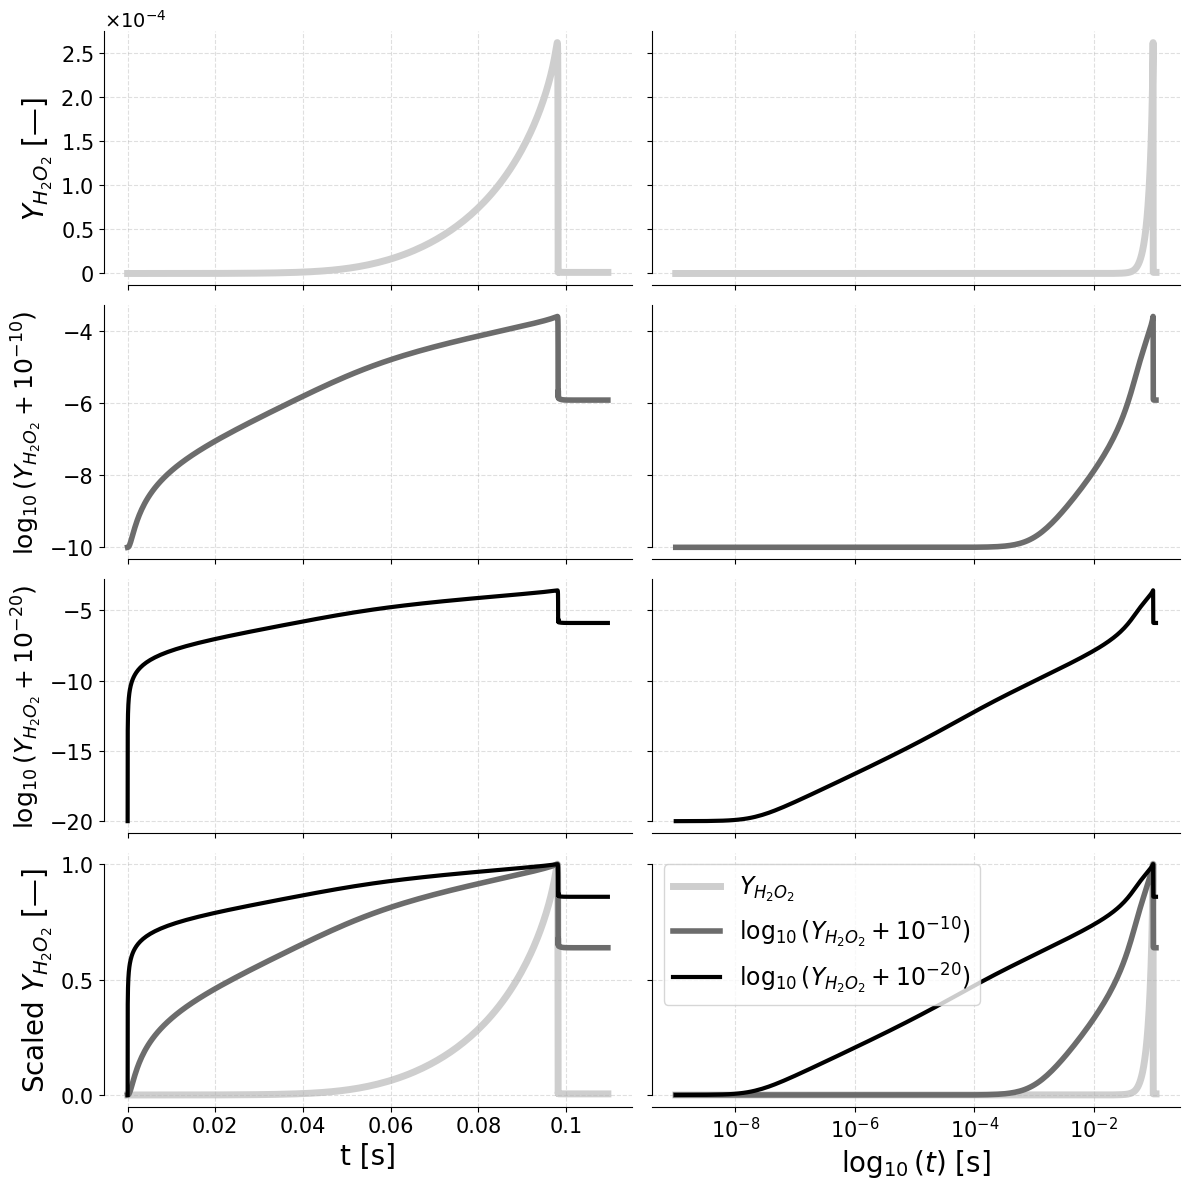

In [27]:
save = True
pathSave = "C:/Users/Admin/Documents/PhD-ULB/Figures/2024-PV-optimization/Paper/EnergyAndAI/Supplementary-material/Analysis-log/"
name = f"Suppl. mat. - H2O2_overTime_differentScales"

nbr_test_trajectory = 4
rows, cols = 4,2

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))  # Define the grid
axes = axes.flatten()

species_to_inspect = ['H2O2']
idx_species = 0
species_label = species_to_inspect[idx_species].replace("2", "_{2}")

greys = cm.get_cmap('Greys')

addLogArray = [0, 0, 1e-10, 1e-10, 1e-20, 1e-20]
linewidthArray = [5, 5, 4, 4, 3, 3]
greyArray = [greys(0.3), greys(0.3), greys(0.65), greys(0.65), "k", "k"]
zorderArray = [1, 1, 2, 2, 3, 3]

#test state space
with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-test-trajectories.h5", 'r') as hf:
    test_trajectory = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:], columns = state_space_names)


#test time trajectories
with h5py.File(f"{path_data_autoignition}{filename_autoignition}time-test-trajectories.h5", 'r') as hf:
    test_trajectory_time = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:]).to_numpy()

# remove first point which has t=0s
test_trajectory_time_nonzero = test_trajectory_time[test_trajectory_time > 0]
test_trajectory_nonzero = test_trajectory[test_trajectory_time > 0]

class ScalarFormatterZero(ticker.ScalarFormatter):
    def __call__(self, x, pos=None):
        if x == 0:
            return "0"
        return super().__call__(x, pos)
    
def zero_formatter(x, pos):
    if x == 0:
        return "0"
    return f"{x:g}"
    
for idxFig in range((rows-1)*cols):

    addLog = addLogArray[idxFig]

    if(addLog == 0):
        speciesTraj = test_trajectory_nonzero[species_to_inspect[idx_species]]
    elif(addLog > 0):
        speciesTraj = np.log10(test_trajectory_nonzero[species_to_inspect[idx_species]] + addLog)
    
    ax = axes[idxFig]
    ax.plot(test_trajectory_time_nonzero, speciesTraj, color = greyArray[idxFig], linewidth = linewidthArray[idxFig])

    if(idxFig%2 == 0 and idxFig>=(rows-1)*cols):
        ax.set_xlabel("t [s]", fontsize = 15)
    elif((idxFig+1)%2 == 0):
        ax.set_xscale("log")
        if(idxFig>=(rows-1)*cols):
            ax.set_xlabel("$\log_{10}(t)$ [s]", fontsize = 15)
        else:
            ax.set_xticklabels([])
    else:
            ax.set_xticklabels([])

    if(idxFig%cols == 0):
        _, xmax = ax.get_xlim()
        ax.spines["bottom"].set_bounds(0, xmax)
        if(idxFig < cols):
            ax.set_ylabel(f"$Y_{{{species_label}}}$ [\u2014]", fontsize = 20)
            _, ymax = ax.get_ylim()
            ax.spines["left"].set_bounds(0, ymax)
        else:
            ax.set_ylabel(f"$\log_{{{10}}}(Y_{{{species_label}}} + 10^{{{int(np.log10(addLog))}}})$", fontsize = 18)
            _, ymax = ax.get_ylim()
            ax.spines["left"].set_bounds(np.log10(addLog), ymax)
    else:
        ax.set_yticklabels([])
        if(idxFig < cols):
            _, ymax = ax.get_ylim()
            ax.spines["left"].set_bounds(0, ymax)
        else:
            _, ymax = ax.get_ylim()
            ax.spines["left"].set_bounds(np.log10(addLog), ymax)

    ax.tick_params(axis='y', labelsize=15)
    ax.grid(True, linestyle='--', alpha=0.4)

    if idxFig in [0]:
        formatter = ScalarFormatterZero(useMathText=True)
        formatter.set_scientific(True)
        formatter.set_powerlimits((-4, -4))   # force ×10⁻⁴

        ax.yaxis.set_major_formatter(formatter)
        ax.yaxis.get_offset_text().set_size(14)

legend_handles = []

for idxFig in range(int(len(addLogArray)/2)*cols):

    addLog = addLogArray[idxFig]

    if(addLog == 0):
        speciesTraj = test_trajectory_nonzero[species_to_inspect[idx_species]]
        
    elif(addLog > 0):
        speciesTraj = np.log10(test_trajectory_nonzero[species_to_inspect[idx_species]] + addLog)

    speciesTraj_scaled = (speciesTraj - speciesTraj.min())/(speciesTraj.max() - speciesTraj.min())

    ax = axes[6 + idxFig%2]
    line, = ax.plot(test_trajectory_time_nonzero, speciesTraj_scaled, c = greyArray[idxFig], linewidth = linewidthArray[idxFig], zorder = zorderArray[idxFig])
    ax.set_yticks([0, 0.5, 1])
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)

    if(idxFig%2 == 0):
        ax.set_xlabel("t [s]", fontsize = 20)
    elif((idxFig+1)%2 == 0):
        ax.set_xscale("log")
        
        ax.set_xlabel("$\log_{10}(t)$ [s]", fontsize = 20)
        
        if idxFig < cols:
            label = f"$Y_{{{species_label}}}$"
        else:
            log_offset = int(np.log10(addLog))
            label = f"$\log_{{10}}(Y_{{{species_label}}} + 10^{{{log_offset}}})$"
        legend_handles.append((line, label))
    else:
            ax.set_xticklabels([])

    if(idxFig%cols == 0):
        ax.set_ylabel(f"Scaled $Y_{{{species_label}}}$ [\u2014]", fontsize = 20)
        _, xmax = ax.get_xlim()
        ax.spines["bottom"].set_bounds(0, xmax)
        ax.xaxis.set_major_formatter(FuncFormatter(zero_formatter))
    else:
        ax.set_yticklabels([])

    ax.grid(True, linestyle='--', alpha=0.4)

    ax.spines["left"].set_bounds(0, 1)

if legend_handles:
    handles, labels = zip(*legend_handles)
    axes[7].legend(handles, labels, fontsize=17, loc="best", frameon=True)

# Remove top and right spines for all subplots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
#fig.subplots_adjust(hspace=0.15)
if(save):
    plt.savefig(pathSave + name + ".png", dpi=1000, bbox_inches = "tight")
    plt.savefig(pathSave + name + ".pdf", bbox_inches = "tight")

plt.show()